## Hands-on - Basic Statistics in Python

Name: Kamonnun Silarat <br>
Date: 19.03.2025

In [1]:
# Import necessary libraries
import pandas as pd  # for handling tabular datasets
import numpy as np  # for numerical computations
from scipy import stats  # for statistical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for advanced statistical plots

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/refs/heads/main/medical_examination.csv"  # URL link to the dataset stored on GitHub

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset

Dataset Preview:
   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


### **Exercise 1: Display Dataset Information**
**Question:** Use df.info() to display basic information about the dataset.

In [2]:
# Your code here:
print("Dataset basic information:")
df.info()

Dataset basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### **Exercise 2: Calculate Minimum and Maximum Values**  
**Question:** Calculate the **minimum** and **maximum** values for the following columns:  

- **"height"**  
- **"weight"**  
- **"ap_hi"** (systolic blood pressure)  
- **"ap_lo"** (diasblood pressure)  


In [3]:
# Your code here:
height_values = df["height"].dropna().values
weight_values = df["weight"].dropna().values
ap_hi_values = df["ap_hi"].dropna().values
ap_lo_values = df["ap_lo"].dropna().values

# Calculate and display each minimum and maximum values
# Height
print("Minimum height:", np.min(height_values))
print("Maximum height:", np.max(height_values))
# Weight
print("Minimum weight:", np.min(weight_values))
print("Maximum weight:", np.max(weight_values))
# Systolic blood pressure (ap_hi)
print("Minimum systolic blood pressure:", np.min(ap_hi_values))
print("Maximum systolic blood pressure:", np.max(ap_hi_values))
# Diasblood pressure (ap_lo)
print("Minimum diasblood pressure:", np.min(ap_lo_values))
print("Maximum diasblood pressure:", np.max(ap_lo_values))

Minimum height: 55
Maximum height: 250
Minimum weight: 10.0
Maximum weight: 200.0
Minimum systolic blood pressure: -150
Maximum systolic blood pressure: 16020
Minimum diasblood pressure: -70
Maximum diasblood pressure: 11000


### **Exercise 3: Compute Measures of Central Tendency**  
**Question:** Calculate the **mean**, **median**, and **mode** for the specified columns:  

- **Mean:** Compute the mean of the **"weight"** column.  
- **Median:** Compute the median of the **"ap_hi"** (systolic blood pressure) column.  
- **Mode:** Compute the mode of the **"gender"** column.  

In [4]:
# Additional cell
print("Available columns:", df.columns)

Available columns: Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [5]:
# Your code here:

# Additioal note: since the data columns doesn't have 'gender', I decided to use 'sex' for mode calculation instead.
mean_weight = df["weight"].mean()
median_ap_hi = np.median(df["ap_hi"] / ((df["ap_hi"] / 100) ** 2))
mode_sex = stats.mode(df["sex"], keepdims=True)

print(f"Mean weight: {mean_weight:.2f} kg")
print(f"Median of systolic blood pressure: {median_ap_hi}")
print(f"Most frequent sex value: {mode_sex.mode[0]}, Count: {mode_sex.count[0]} ")

Mean weight: 74.21 kg
Median of systolic blood pressure: 83.33333333333334
Most frequent sex value: 1, Count: 45522 


### **Exercise 4: Compute Quantiles and Interquartile Range (IQR)**  
**Question:** Compute the **Q1**, **Q2 (median)**, and **Q3** for the **"cholesterol"** column and calculate the **Interquartile Range (IQR)**. 


Q1 or 25 percentile: 1.00
Q2 or 50 percentile (median): 1.00
Q3 or 75 percentile: 2.00
Interquartile range or IQR: 1.00


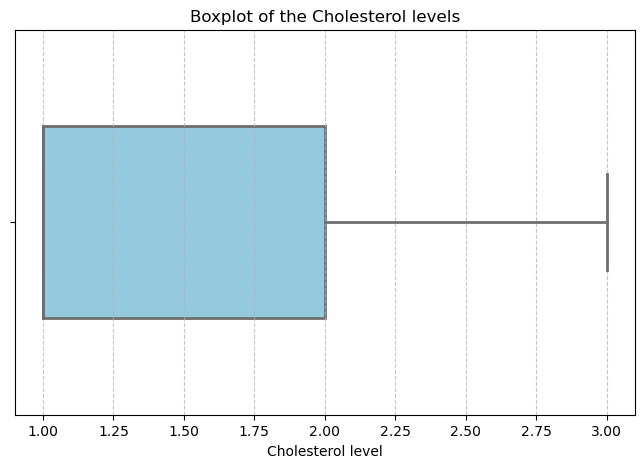

In [6]:
# Your code here:
# Calculating using Pandas
q1_cholesterol = df["cholesterol"].quantile(0.25)
q2_cholesterol = df["cholesterol"].quantile(0.50)
q3_cholesterol = df["cholesterol"].quantile(0.75)
iqr_cholesterol = q3_cholesterol - q1_cholesterol

print(f"Q1 or 25 percentile: {q1_cholesterol:.2f}")
print(f"Q2 or 50 percentile (median): {q2_cholesterol:.2f}")     
print(f"Q3 or 75 percentile: {q3_cholesterol:.2f}")    
print(f"Interquartile range or IQR: {iqr_cholesterol:.2f}")

# Plot a boxplot for diagram diaplay:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["cholesterol"], color="skyblue", width=0.5, linewidth=2)
plt.title("Boxplot of the Cholesterol levels")
plt.xlabel("Cholesterol level")
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

### **Exercise 5: Grouped Analysis by Gender**  
**Question:** Calculate the **mean** of the **"weight"** column grouped by **"gender"**. 


In [7]:
# Your code here:
mean_weight_group_sex = df.groupby("sex")["weight"].mean()
print("Mean of weight grouped by sex:", mean_weight_group_sex)

Mean of weight grouped by sex: sex
1    72.565902
2    77.258565
3    69.818182
Name: weight, dtype: float64
